# 데이터셋 로드

In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    RandomizedSearchCV,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, balanced_accuracy_score,
                             f1_score, roc_auc_score, log_loss,
                             top_k_accuracy_score)

# 샘플링 범위(무작위 탐색용)
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, top_k_accuracy_score


df = pd.read_csv('../dataset/csv/cpp_dataset.csv')

In [3]:
# Cpp Feature
features = [
    "code_size",
    "total_lines",
    "blank_ratio",
    "comment_ratio",
    "num_funcs",
    "avg_func_length",
    "max_control_depth",
    "control_count",
    "unique_identifiers",
    "token_count"
] + [f'vec_{i}' for i in range(768)]

X = df[features]
y = df["label"]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 시각화 함수

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

plt.rcParams['font.family'] = 'NanumGothic'

def plot_classification_report(y_true, y_pred, class_names, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    df_report = df_report.drop(columns=['support'], errors='ignore')

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"{model_name} - Classification Report")
    plt.show()

def plot_confusion(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# RF test

Top-1 accuracy : 0.926
Balanced acc. : 0.9259999999999999
Macro F1      : 0.9259333400060055
Weighted F1   : 0.9259333400060055


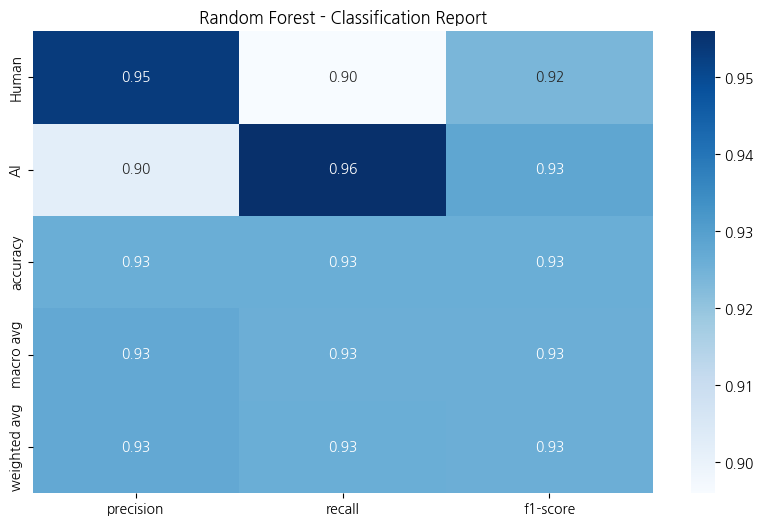

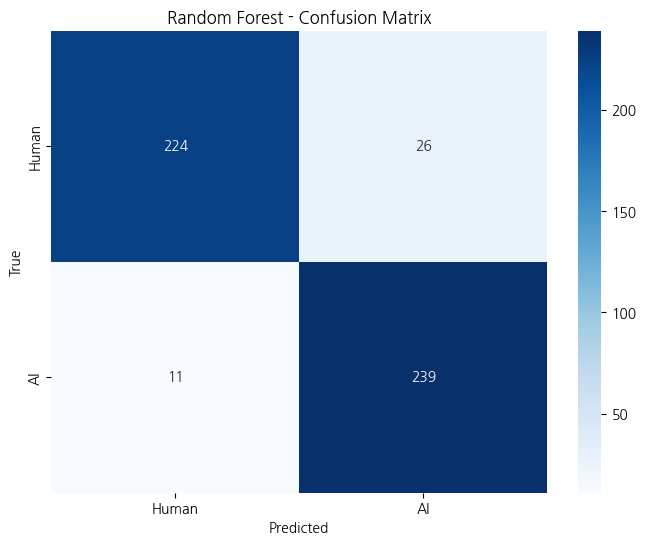

In [6]:
python_binary_classifier = joblib.load("../models/cpp_binary_classifier.joblib")
y_pred  = python_binary_classifier.predict(X_test)
y_proba = python_binary_classifier.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))

plot_classification_report(y_test, y_pred, ["Human", "AI"], "Random Forest")
plot_confusion(y_test, y_pred, ["Human", "AI"], "Random Forest")

# XGBoost Test

Top-1 accuracy : 0.956
Balanced acc. : 0.956
Macro F1      : 0.9559823929571829
Weighted F1   : 0.9559823929571828
Log-loss      : 0.15524510912353243


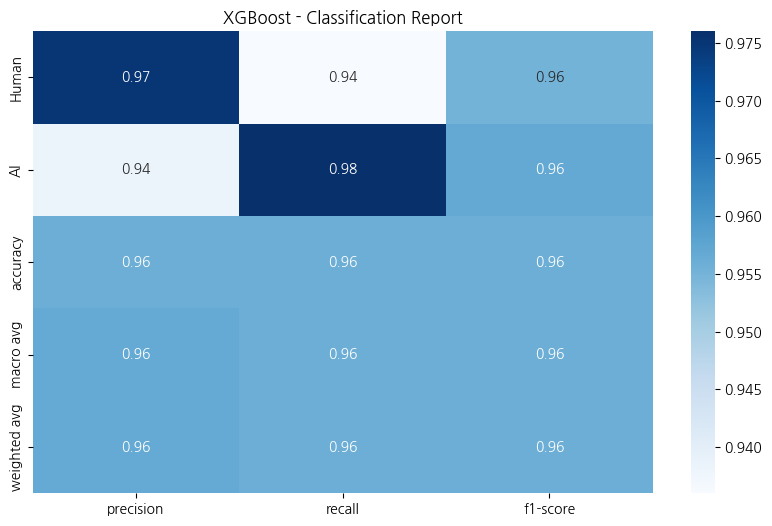

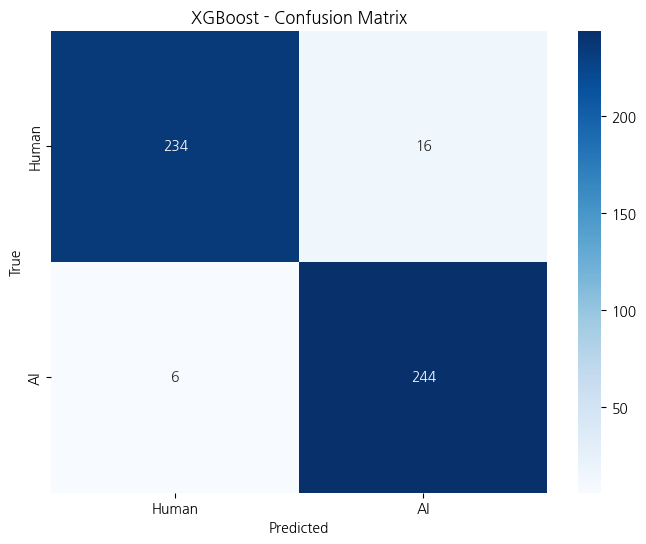

In [7]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
python_multilabel_classifier = joblib.load("../models/cpp_xgb_binary.joblib")
y_pred  = python_multilabel_classifier.predict(X_test)
y_proba = python_multilabel_classifier.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))
print("Log-loss      :", log_loss(y_test, y_proba))

plot_classification_report(y_test, y_pred, ["Human", "AI"], "XGBoost")
plot_confusion(y_test, y_pred, ["Human", "AI"], "XGBoost")

# SVM Test

/home/uijong/miniforge3/envs/classifier/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/uijong/miniforge3/envs/classifier/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Top-1 accuracy : 0.964
Balanced acc. : 0.964
Macro F1      : 0.9639976958525346
Weighted F1   : 0.9639976958525347
Log-loss      : 0.10389186760267918


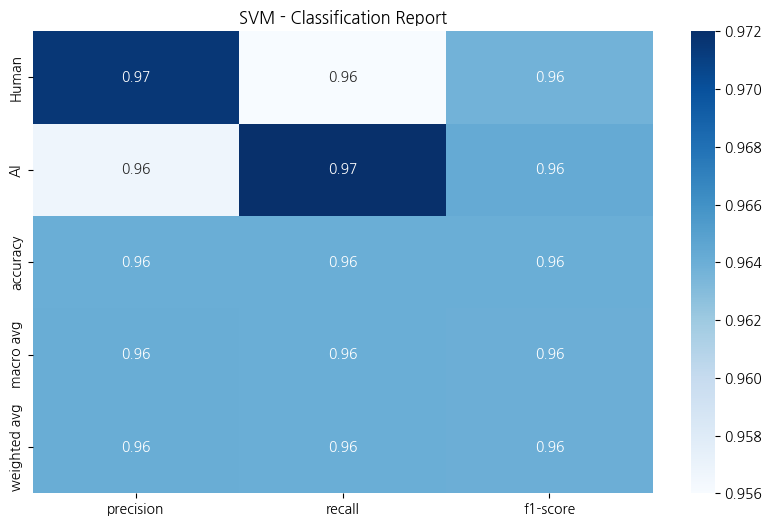

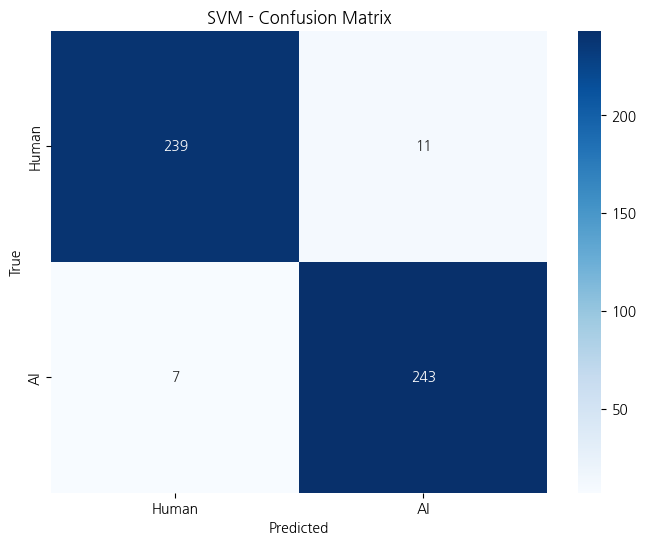

In [8]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
python_multilabel_classifier = joblib.load("../models/svm_binary_cpp.joblib")
y_pred  = python_multilabel_classifier.predict(X_test)
y_proba = python_multilabel_classifier.predict_proba(X_test)

# 결과 출력
print("Top-1 accuracy :", accuracy_score(y_test, y_pred))
print("Balanced acc. :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1      :", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1   :", f1_score(y_test, y_pred, average='weighted'))
print("Log-loss      :", log_loss(y_test, y_proba))

plot_classification_report(y_test, y_pred, ["Human", "AI"], "SVM")
plot_confusion(y_test, y_pred, ["Human", "AI"], "SVM")

# Matplotlib Assemble

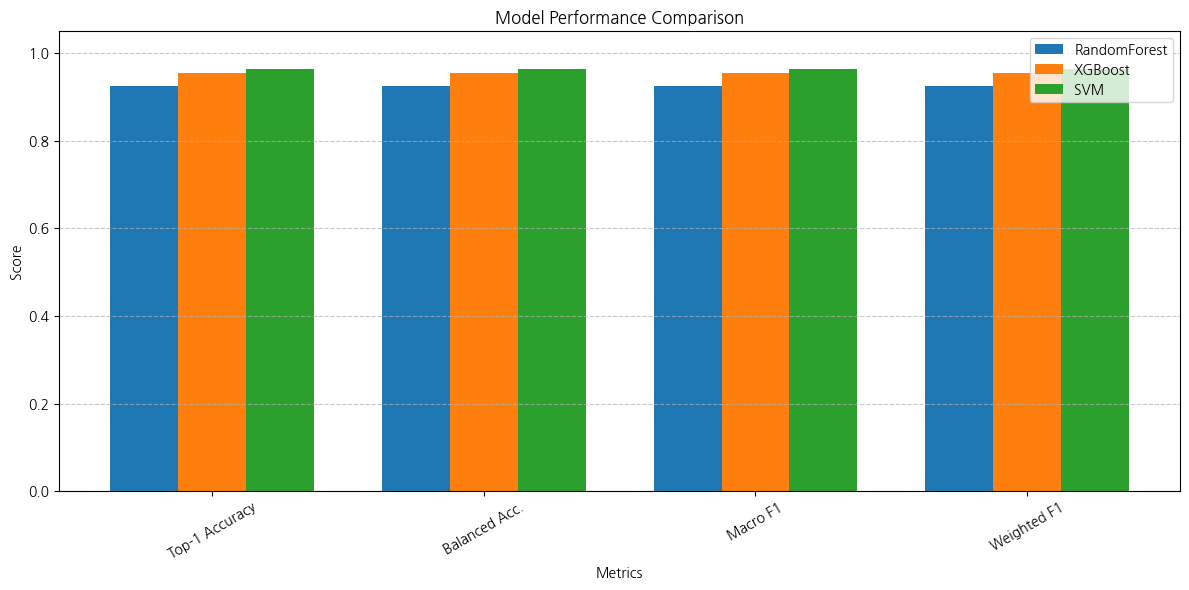

In [9]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Top-1 Accuracy', 'Balanced Acc.', 'Macro F1', 'Weighted F1']

random_forest_scores = [0.926, 0.9259999999999999, 0.9259333400060055, 0.9259333400060055]
xgboost_scores       = [0.956, 0.956, 0.9559823929571829, 0.9559823929571828]
svm_scores           = [0.964, 0.964, 0.9639976958525346, 0.9639976958525347]

# 바 차트용 위치 설정
x = np.arange(len(metrics))
width = 0.25

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(x - width, random_forest_scores, width, label='RandomForest')
plt.bar(x, xgboost_scores, width, label='XGBoost')
plt.bar(x + width, svm_scores, width, label='SVM')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics, rotation=30)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()